### Vă rugăm să introduceți numele dumneavoastră
#Nume: Paula Popescu
#Nivel: Avansat/Incepator

# Laborator: Jocul X și 0 cu Inteligență Artificială

În acest laborator, vom crea un joc clasic de **X și 0** (sau "Tic-Tac-Toe") folosind Python și Google Colab. Mai mult decât atât, vom învăța cum să implementăm o strategie de **inteligență artificială (AI)** care va juca împotriva noastră folosind algoritmul **Minimax**.

### Ce veți învăța?
- Cum să desenăm tabla de joc.
- Cum să verificăm mutările și să stabilim câștigătorul.
- Ce este algoritmul **Minimax** și cum ajută AI-ul să ia decizii optime.
- Cum funcționează AI-ul într-un joc simplu și cum ia decizii mai bune decât un jucător uman.




## **Partea 1** - Intrebări teoretice:
In aceasta parte vom raspunde la 6 intrebari teoretice.


Rezolva urmatoarele probleme.

### ✏️ **Problema 1:**
Cte configurații de table de joc pot exista într-un joc de **X și 0** pe o tablă **3x3** după ce ambii jucători au făcut **câte o mutare**? (pe tablă se află doar un X și un 0).

---

### ✏️ **Problema 2:**
Câte configurații de table de joc pot exista într-un joc de **X și 0** pe o tablă **nxn** după ce ambii jucători au făcut **câte două mutări**? (pe tablă se află doar două X-uri și două 0-uri).

---

### ✏️ **Problema 3:**
Aproximativ câte poziții posibile de table de joc pot exista într-un joc de **X și 0** pe o tablă **nxn**?

---

### ✏️ **Problema 4:**
Să presupunem că dispunem de o memorie de 16 GB (16 × 1024^3 bytes). O tablă de joc, reprezentată ca o matrice **nxn**, ocupă **n × n × 8 bytes**. Câte astfel de matrice de joc putem stoca în memorie? Aproximativ care este cea mai mare dimensiune a tablei pentru care putem salva toate pozițiile posibile (bazat pe răspunsul de la **problema 3**)?

---

### ✏️ **Problema 5:**
Există moduri de a evita stocarea unui număr așa de mare de vectori bi-dimensionali **nxn**? (Hint: folosind o structură de date diferită)

---

### ✏️ **Problema 6:**
Dacă analizarea a 100 de poziții durează o secundă, aproximativ câte secunde va lua analizarea tuturor pozițiilor de pe o tablă **6x6**?

✏️ **Problema 1:** Solutia ta aici!

✏️ **Problema 2:** Solutia ta aici!

✏️ **Problema 3:** Solutia ta aici!

✏️ **Problema 4:** Solutia ta aici!

✏️ **Problema 5:** Solutia ta aici!

✏️ **Problema 6:** Solutia ta aici!

## **Partea 2** - X și 0 pe o tablă 3 x 3:

In aceasta parte vom vedea o implementare a algoritmului minimax pe o tabla 3x3.

In [11]:
#@title Importarea bibliotecilor necesare
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#@title Desenarea tablei de joc

def print_board(board):
    fig, ax = plt.subplots(figsize=(6, 6))  # Creăm o figură de 6x6 pentru tabla de joc.

    # Desenăm grila de joc (liniile orizontale și verticale).
    ax.set_xticks(np.arange(0, 3, 1))
    ax.set_yticks(np.arange(0, 3, 1))
    ax.grid(True, color='black', linewidth=2)  # Setăm liniile grilei să fie negre și groase.

    # Ascundem marcajele și etichetele axelor.
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Setăm fundalul să fie alb.
    ax.set_facecolor('white')

    # Afișăm X-urile și O-urile pe tabla de joc.
    for i in range(3):
        for j in range(3):
            if board[i][j] == "X":
                ax.text(j + 0.5, i + 0.5, "X", ha='center', va='center', fontsize=50, color="red", weight='bold')
            elif board[i][j] == "O":
                ax.text(j + 0.5, i + 0.5, "O", ha='center', va='center', fontsize=50, color="blue", weight='bold')

    # Stabilim limitele grilei.
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    plt.gca().invert_yaxis()  # Inversăm axa y pentru a corespunde cu coordonatele matricei.

    # Afișăm tabla de joc.
    plt.show()


In [13]:
#@title Implementare Reguli

def is_valid_move(board, row, col):
    return board[row][col] == " "

def make_move(board, row, col, player):
    if is_valid_move(board, row, col):
        board[row][col] = player  # Setăm locul respectiv cu simbolul jucătorului.
        return True
    return False

def check_win(board, player):
    # Verificăm liniile
    for row in board:
        if all([cell == player for cell in row]):
            return True

    # Verificăm coloanele
    for col in range(3):
        if all([board[row][col] == player for row in range(3)]):
            return True

    # Verificăm diagonalele
    if all([board[i][i] == player for i in range(3)]) or all([board[i][2 - i] == player for i in range(3)]):
        return True

    return False

def is_draw(board):
    return all([cell != " " for row in board for cell in row])


In [14]:
#@title Implementare Minmax

def minimax(board, depth, is_maximizing):
    if check_win(board, "X"):
        return -1  # Jucătorul X câștigă, deci scor negativ pentru AI.
    if check_win(board, "O"):
        return 1  # AI câștigă, deci scor pozitiv.
    if is_draw(board):
        return 0  # Egalitate.

    if is_maximizing:
        best_score = -float("inf")
        for row in range(3):
            for col in range(3):
                if board[row][col] == " ":
                    board[row][col] = "O"  # AI face mutarea.
                    score = minimax(board, depth + 1, False)
                    board[row][col] = " "
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float("inf")
        for row in range(3):
            for col in range(3):
                if board[row][col] == " ":
                    board[row][col] = "X"  # Jucătorul face mutarea.
                    score = minimax(board, depth + 1, True)
                    board[row][col] = " "
                    best_score = min(score, best_score)
        return best_score

def find_best_move(board):
    best_move = None
    best_score = -float("inf")
    for row in range(3):
        for col in range(3):
            if board[row][col] == " ":
                board[row][col] = "O"
                score = minimax(board, 0, False)
                board[row][col] = " "
                if score > best_score:
                    best_score = score
                    best_move = (row, col)
    return best_move


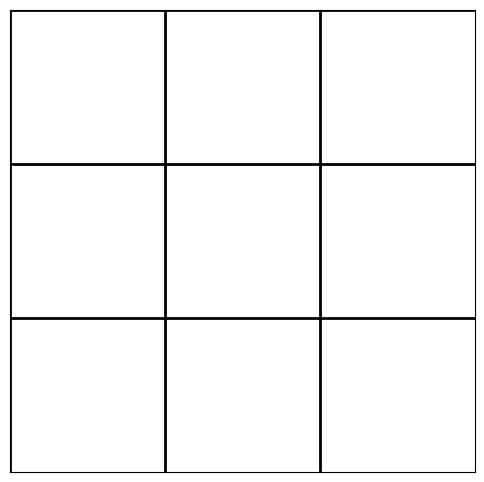

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 1 1


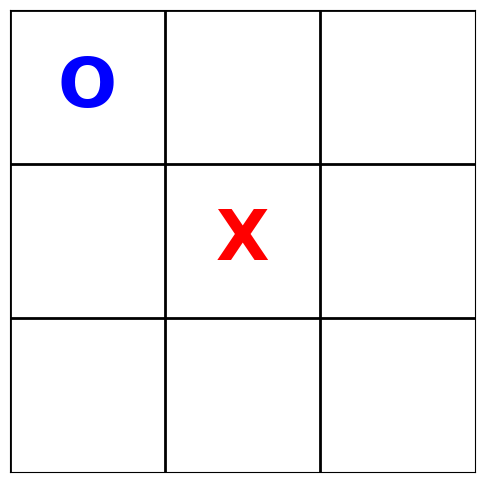

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 2 2


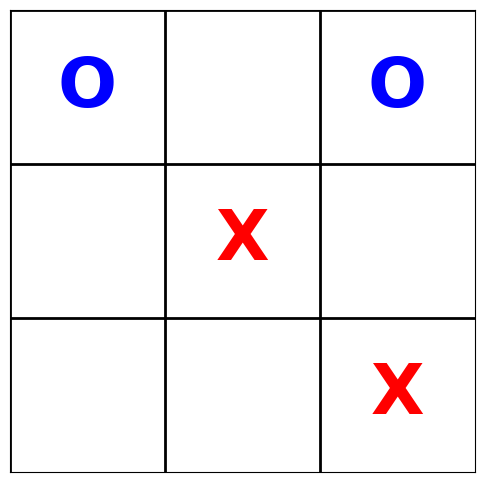

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 0 1


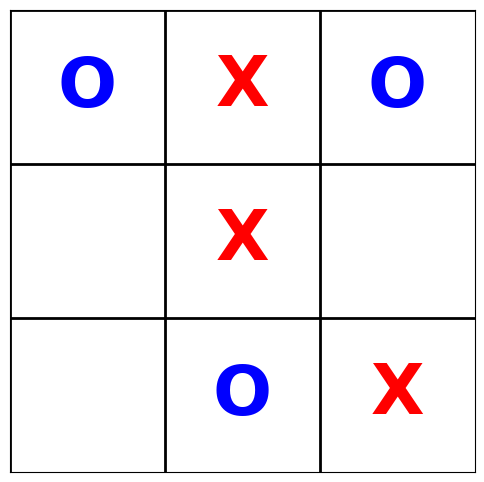

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 1 0


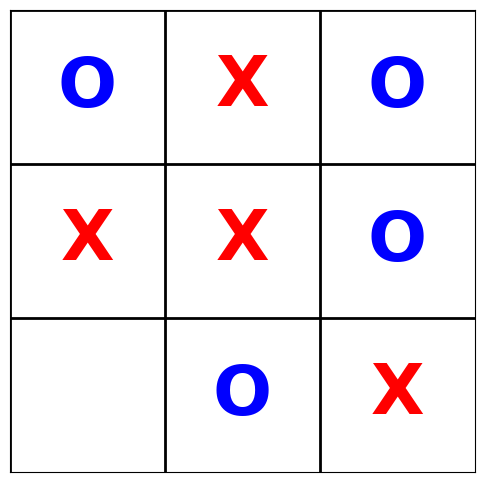

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 0 2
Acest loc este deja ocupat. Încercați din nou.
Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 2 0


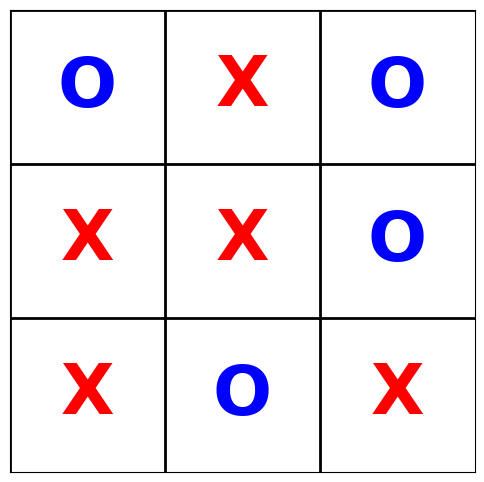

Este o remiză!


In [15]:
# @title Simulare joc

board = [[" ", " ", " "],
         [" ", " ", " "],
         [" ", " ", " "]]

while True:
    print_board(board)  # Afișează tabla de joc

    if check_win(board, "X"):  # Verifică dacă jucătorul X a câștigat
        print("X a câștigat!")
        break
    if check_win(board, "O"):  # Verifică dacă AI-ul (O) a câștigat
        print("O a câștigat!")
        break
    if is_draw(board):  # Verifică dacă jocul s-a terminat la egalitate
        print("Este o remiză!")
        break

    # Rândul jucătorului
    while True:
        try:
            # Solicită mutarea jucătorului (rând și coloană, separate prin spațiu)
            row, col = map(int, input("Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): ").split())
            if 0 <= row < 3 and 0 <= col < 3:  # Verifică dacă mutarea este în limitele tablei
                if make_move(board, row, col, "X"):  # Efectuează mutarea pentru jucătorul X
                    break
                else:
                    print("Acest loc este deja ocupat. Încercați din nou.")
            else:
                print("Intrare invalidă. Introduceți numerele rândului și coloanei între 0 și 2.")
        except ValueError:
            print("Intrare invalidă. Vă rugăm să introduceți două numere întregi separate prin spațiu.")

    # Rândul AI-ului
    ai_move = find_best_move(board)  # AI-ul alege cea mai bună mutare
    if ai_move:
        make_move(board, ai_move[0], ai_move[1], "O")  # AI-ul face mutarea pentru O


## **Partea 3** - X și 0 pe o tablă 6x6:

În Partea 1 am observat că, pentru table de joc foarte mari, spațiul necesar pentru a explora toate posibilitățile jocului până la final crește exponențial. De această dată, schimbăm și regula de câștig: un jucător trebuie să alinieze **4 simboluri consecutive** (fie pe diagonală, fie pe linie, fie pe coloană) pentru a câștiga.

Pe o tablă de **6x6**, algoritmul Minimax ar putea să nu fie capabil să analizeze toate finalurile posibile pentru a alege cea mai bună mutare. În acest context, este necesar să **limităm adâncimea căutării**, de exemplu la **2 niveluri**, și să folosim o **funcție de evaluare** pentru pozițiile care nu sunt terminale.

În această parte a laboratorului vei:
- **Implementa** propria ta funcție `minimax` pentru o tablă de 6x6 (**Problema 7**).

- **Prezenta Idei pentru Funcții Heuristice** Pentru a îmbunătăți performanța algoritmului tău, este important să definești funcții heuristice care să evalueze pozițiile non-terminal ale tablei de joc. Aceste funcții vor ajuta algoritmul să decidă care poziții sunt mai bune decât altele, chiar și atunci când adâncimea de căutare este limitată. (**Problema 8**)

- **Implementa** o funcție de evaluare heuristică numită `analizeaza_tabla(board, is_maximizing)` astfel încât algoritmul tău AI să fie mai inteligent (**Problema 9**).


In [19]:
#@title Logica pentru tabla 6x6: afisarea tablei, verificare conditii castig si remiza
def print_board(board):
    fig, ax = plt.subplots(figsize=(6, 6))  # Creăm o figură de 6x6 pentru tabla de joc.

    # Desenăm grila de joc (liniile orizontale și verticale).
    ax.set_xticks(np.arange(0, 6, 1))
    ax.set_yticks(np.arange(0, 6, 1))
    ax.grid(True, color='black', linewidth=2)  # Setăm liniile grilei să fie negre și groase.

    # Ascundem marcajele și etichetele axelor.
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Setăm fundalul să fie alb.
    ax.set_facecolor('white')

    # Afișăm X-urile și O-urile pe tabla de joc.
    for i in range(6):
        for j in range(6):
            if board[i][j] == "X":
                ax.text(j + 0.5, i + 0.5, "X", ha='center', va='center', fontsize=50, color="red", weight='bold')
            elif board[i][j] == "O":
                ax.text(j + 0.5, i + 0.5, "O", ha='center', va='center', fontsize=50, color="blue", weight='bold')

    # Stabilim limitele grilei.
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    plt.gca().invert_yaxis()  # Inversăm axa y pentru a corespunde cu coordonatele matricei.

    # Afișăm tabla de joc.
    plt.show()



def check_win(board, player):
    n = len(board)  # Dimensiunea tablei (în acest caz, 6)
    win_condition = 4  # Numărul de simboluri consecutive necesare pentru a câștiga

    # Verificăm liniile
    for row in range(n):
        for col in range(n - win_condition + 1):
            if all([board[row][col + i] == player for i in range(win_condition)]):
                return True

    # Verificăm coloanele
    for col in range(n):
        for row in range(n - win_condition + 1):
            if all([board[row + i][col] == player for i in range(win_condition)]):
                return True

    # Verificăm diagonalele (din stânga sus spre dreapta jos)
    for row in range(n - win_condition + 1):
        for col in range(n - win_condition + 1):
            if all([board[row + i][col + i] == player for i in range(win_condition)]):
                return True

    # Verificăm diagonalele (din dreapta sus spre stânga jos)
    for row in range(n - win_condition + 1):
        for col in range(win_condition - 1, n):
            if all([board[row + i][col - i] == player for i in range(win_condition)]):
                return True

    return False

def is_draw(board):
    # Verifică dacă toate pozițiile sunt ocupate
    return all([cell != " " for row in board for cell in row])


### ✏️ **Problema 7:**
Codul de mai jos reprezintă o funcție `minimax`, dar aceasta conține câteva greșeli. Corectează aceste greșeli, bazându-te pe exemplul corect de implementare a algoritmului `minimax` prezentat în Partea a doua.

Pentru a corecta funcția:

- **Asigură-te că algoritmul respectă regulile clasice de `minimax`**: Algoritmul trebuie să maximizeze scorul pentru jucătorul curent și să minimizeze scorul pentru adversar.

- **Corectează posibilele erori legate de recursivitate și gestionarea adâncimii limitate**: Asigură-te că adâncimea căutării este gestionată corect și că funcția `minimax` este apelată corespunzător pentru fiecare mutare.

- **Alte erori**: Asigură-te că dimensiunea tablei de joc este cea corecta, indicii tablei la care verificam anumite caracteristici sunt cei buni.

In [25]:
#@title ✏️ Implementare Minmax pe tabla 6x6
import math

# NU SCHIMBA NIMIC IN ACEASTA SECTIUNE
def analizeaza_tabla_0(board, is_maximizing):
  return 0

def minimax_6x6(board, depth, is_maximizing, analizeaza_tabla):
    if check_win(board, "X"):
        return -10000  # Jucătorul X câștigă, deci scor negativ pentru AI.
    if check_win(board, "O"):
        return 10000  # AI câștigă, deci scor pozitiv.
    if is_draw(board):
        return 0  # Egalitate.
    if depth > 2:
        return analizeaza_tabla(board, is_maximizing)
# NU SCHIMBA NIMIC IN ACEASTA SECTIUNE

# REPARA GRESELI DIN ACEST INTERVAL
    if is_maximizing:
        best_score = -float("inf")
        for row in range(8):
            for col in range(8):
                if board[row][col] == " ":
                    board[row][col] = "O"  # AI face mutarea.
                    score = minimax_6x6(board, depth - 1, False, analizeaza_tabla)
                    board[row][col-1] = " "
                    best_score = min(score, best_score)
        return best_score
    else:
        best_score = float("inf")
        for row in range(6):
            for col in range(6):
                if board[row][col] == " ":
                    board[row][col] = "X"  # Jucătorul face mutarea.
                    score = minimax_6x6(board, depth + 1, True, analizeaza_tabla)
                    board[row][col] = " "
                    best_score = min(score, best_score)
        return best_score
# REPARA GRESELI DIN ACEST INTERVAL



# NU SCHIMBA NIMIC IN ACEASTA SECTIUNE
def find_best_move(board, analizeaza_tabla):
    best_move = None
    best_score = -float("inf")
    for row in range(6):
        for col in range(6):
            if board[row][col] == " ":
                board[row][col] = "O"
                score = minimax_6x6(board, 0, False, analizeaza_tabla)
                board[row][col] = " "
                if score > best_score:
                    best_score = score
                    best_move = (row, col)
    return best_move
# NU SCHIMBA NIMIC IN ACEASTA SECTIUNE

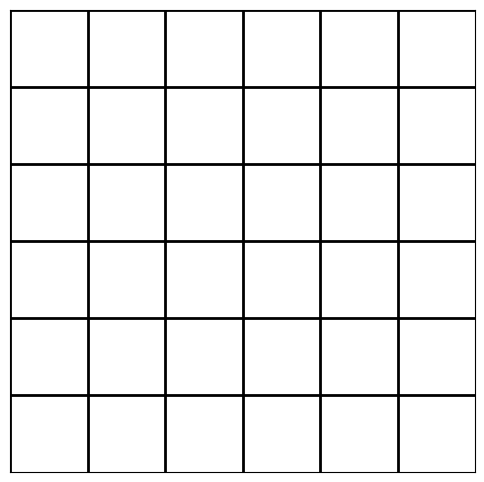

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 3 3


IndexError: list index out of range

In [26]:
#@title Simulare joc

board = [[" " for _ in range(6)] for _ in range(6)]


while True:
    print_board(board)  # Afișează tabla de joc

    if check_win(board, "X"):  # Verifică dacă jucătorul X a câștigat
        print("X a câștigat!")
        break
    if check_win(board, "O"):  # Verifică dacă AI-ul (O) a câștigat
        print("O a câștigat!")
        break
    if is_draw(board):  # Verifică dacă jocul s-a terminat la egalitate
        print("Este o remiză!")
        break

    # Rândul jucătorului
    while True:
        try:
            # Solicită mutarea jucătorului (rând și coloană, separate prin spațiu)
            row, col = map(int, input("Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): ").split())
            if 0 <= row < 6 and 0 <= col < 6:  # Verifică dacă mutarea este în limitele tablei
                if make_move(board, row, col, "X"):  # Efectuează mutarea pentru jucătorul X
                    break
                else:
                    print("Acest loc este deja ocupat. Încercați din nou.")
            else:
                print("Intrare invalidă. Introduceți numerele rândului și coloanei între 0 și 2.")
        except ValueError:
            print("Intrare invalidă. Vă rugăm să introduceți două numere întregi separate prin spațiu.")

    # Rândul AI-ului
    ai_move = find_best_move(board, analizeaza_tabla_0)  # AI-ul alege cea mai bună mutare
    if ai_move:
        make_move(board, ai_move[0], ai_move[1], "O")  # AI-ul face mutarea pentru O

### ✏️ **Problema 8:**

Oferă 3 exemple de funcții `analizeaza_tabla(board, is_maximizing)` pe care le-am putea utiliza pentru a îmbunătăți performanța modelului nostru AI. Aceste funcții sunt destinate să evalueze pozițiile de pe tablă într-un mod care ajută la luarea unor decizii mai informate în cadrul algoritmului `minimax`. Menționăm că pozițiile evaluate nu sunt poziții finale ale jocului, ci poziții intermediare.

**Exemplu:** Evaluarea Bazei Pe Apropierea de Câștig
   - **Descriere:** Evaluează cât de aproape este fiecare jucător de a câștiga pe baza numărului de simboluri aliniate pe toate liniile.
   - **Pseudocod:**
     ```
     FUNCTION analizeaza_tabla_apropiere_castig(board, is_maximizing)
         score = 0
         FOR EACH line IN all_lines
             x_count = COUNT_OF("X" IN line)
             o_count = COUNT_OF("O" IN line)
             IF x_count == 3:
                 score = score + 50  // X este aproape de câștig
             ELSE IF o_count == 3:
                 score = score - 50  // O este aproape de câștig
         RETURN score
     ```



✏️ **Solutia ta aici!**

### ✏️ **Problema 9:**
Codeaza una dintre ideile propuse! Apoi, verifică cât de inteligent este modelul tău! Fii atent la cum se foloseste in general functia is_maximizing si


In [28]:
#@title  ✏️ Implementarea functii Heuristice

import math

def analizeaza_tabla_1(board, is_maximizing):
  ### codul tau aici

  ### codul tau aici
  return 0

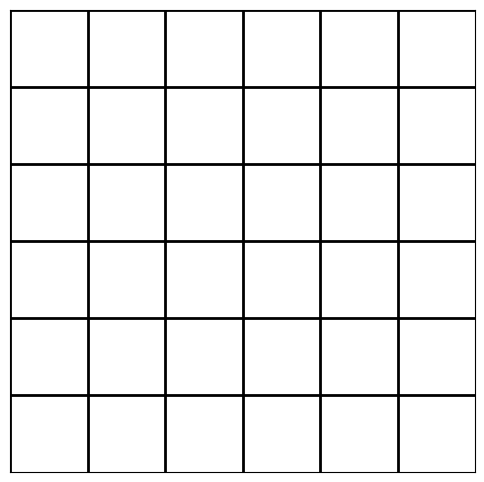

Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): 3 3


IndexError: list index out of range

In [29]:
#@title Simulare noua de joc
board = [[" " for _ in range(6)] for _ in range(6)]


while True:
    print_board(board)  # Afișează tabla de joc

    if check_win(board, "X"):  # Verifică dacă jucătorul X a câștigat
        print("X a câștigat!")
        break
    if check_win(board, "O"):  # Verifică dacă AI-ul (O) a câștigat
        print("O a câștigat!")
        break
    if is_draw(board):  # Verifică dacă jocul s-a terminat la egalitate
        print("Este o remiză!")
        break

    # Rândul jucătorului
    while True:
        try:
            # Solicită mutarea jucătorului (rând și coloană, separate prin spațiu)
            row, col = map(int, input("Introduceți mutarea dvs. (rând și coloană, separate prin spațiu): ").split())
            if 0 <= row < 7 and 0 <= col < 7:  # Verifică dacă mutarea este în limitele tablei
                if make_move(board, row, col, "X"):  # Efectuează mutarea pentru jucătorul X
                    break
                else:
                    print("Acest loc este deja ocupat. Încercați din nou.")
            else:
                print("Intrare invalidă. Introduceți numerele rândului și coloanei între 0 și 2.")
        except ValueError:
            print("Intrare invalidă. Vă rugăm să introduceți două numere întregi separate prin spațiu.")

    # Rândul AI-ului
    ai_move = find_best_move(board, analizeaza_tabla_1)  # AI-ul alege cea mai bună mutare
    if ai_move:
        make_move(board, ai_move[0], ai_move[1], "O")  # AI-ul face mutarea pentru O